In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


In [3]:
chembl = pd.read_csv("ChEMBL/ChEMBL3401.csv", sep=";")

In [4]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL4104224,NaN,NaN,524.51,2.0,5.05,23,COc1cc(-c2cc(F)cnc2OC)c(F)cc1-c1nccc2cc(S(=O)(...,Activity,'=',...,CHEMBL4011598,1,Scientific Literature,J Med Chem,2017.0,NaN,NaN,NaN,NaN,151.00
1,CHEMBL1800116,NaN,NaN,355.87,1.0,5.92,18,Cc1c(Cl)cccc1Oc1cccn2c(C3CCCCCC3)nnc12,EC50,'=',...,CHEMBL1800042,1,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,0.15
2,CHEMBL1617,RIFAXIMIN,4.0,785.89,3.0,6.16,Rifaximin,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c5c(...,Activity,NaN,...,CHEMBL1649065,1,Scientific Literature,J Med Chem,2011.0,CHEMBL3307718,NaN,NaN,NaN,NaN
3,CHEMBL1800117,NaN,NaN,353.85,1.0,5.32,21,Cc1c(Cl)cccc1Oc1cccn2c(C34CCC(CC3)C4)nnc12,EC50,'=',...,CHEMBL1800042,1,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,0.15
4,CHEMBL3233122,NaN,NaN,631.58,2.0,6.26,8,CC[C@@H](CN(c1ccccc1)S(=O)(=O)C1CC1)N1C(=O)[C@...,Activity,'=',...,CHEMBL3232857,1,Scientific Literature,J Med Chem,2014.0,NaN,NaN,NaN,NaN,93.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,CHEMBL561,LOMEFLOXACIN,4.0,351.35,0.0,1.80,lomefloxacin,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21,AC50,'>',...,CHEMBL5291721,1,Scientific Literature,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.00
6897,CHEMBL1583,BACAMPICILLIN,4.0,465.53,0.0,1.30,bacampicillin,CCOC(=O)OC(C)OC(=O)[C@@H]1N2C(=O)[C@@H](NC(=O)...,AC50,'>',...,CHEMBL5291721,1,Scientific Literature,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.00
6898,CHEMBL374478,RIFAMPIN,4.0,822.95,3.0,4.34,rif,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C...,EC50,'=',...,CHEMBL5380805,1,Scientific Literature,J Med Chem,2023.0,NaN,TIME = 24.0 hr,ACTIVATOR,NaN,1.44
6899,CHEMBL3898121,NaN,NaN,433.41,0.0,3.90,"3l, Mixture of enantiomer",NC(=O)c1cc(-c2ccc(F)cc2)c2ccc(CN3CCOC(C(F)(F)F...,EC50,'=',...,CHEMBL5360658,1,Scientific Literature,ACS Med Chem Lett,2023.0,NaN,DOSE = 30.0 microM,AGONIST,NaN,16.80


In [5]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [6]:
chembl["Data Validity Comment"].value_counts()

Data Validity Comment
Outside typical range    125
Name: count, dtype: int64

In [7]:
chembl["Action Type"].value_counts()

Action Type
AGONIST            413
ACTIVATOR          366
ANTAGONIST         205
INHIBITOR          153
INVERSE AGONIST     91
BINDING AGENT        7
DEGRADER             5
PARTIAL AGONIST      1
Name: count, dtype: int64

In [8]:
chembl["Standard Units"].value_counts()

Standard Units
nM             3650
%              2145
uM              202
degrees C         8
ng/ml             6
M                 2
10'-6 mol/L       2
Name: count, dtype: int64

In [9]:
chembl["Standard Type"].value_counts()

Standard Type
AC50              1959
Activity          1395
EC50              1339
IC50               557
Inhibition         513
Efficacy           378
Emax               208
%max               168
MEC                132
Ratio               65
FC                  60
EC20                43
EC60                23
max activation      22
NOAEL               10
Delta Tm             8
Ki                   5
Imax                 4
INH                  2
pXC50                2
XC50                 2
Fold change          2
Kd                   1
EC                   1
Ratio EC50           1
DC50                 1
Name: count, dtype: int64

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

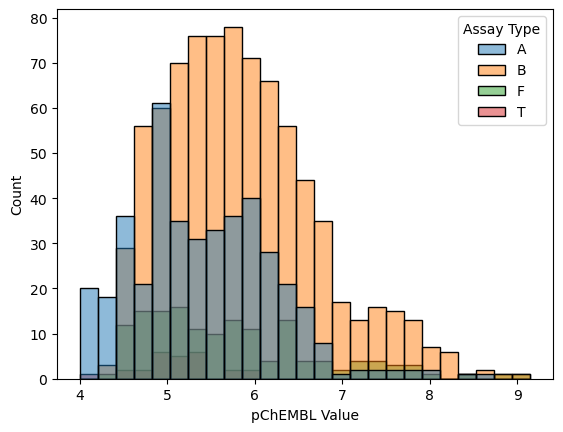

In [10]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")

<Axes: xlabel='Action Type', ylabel='count'>

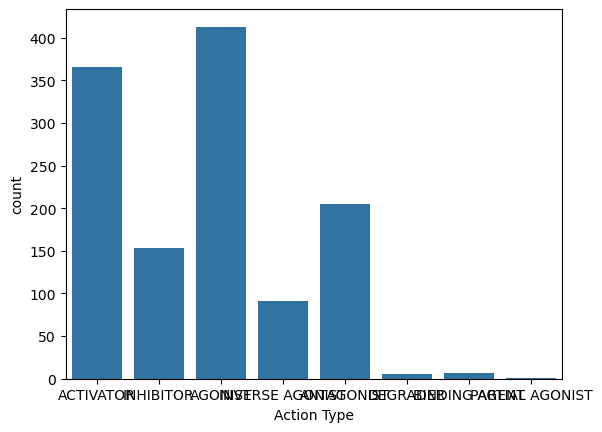

In [11]:
sns.countplot(data=chembl, x="Action Type")

In [12]:
n_mol = chembl["Molecule ChEMBL ID"].nunique()
n_mol

3548

In [13]:
n_assays = chembl["Assay ChEMBL ID"].nunique()
n_assays

647

In [14]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [15]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [16]:

with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6901/6901 [01:15<00:00, 91.69it/s]


In [17]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [18]:
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6901/6901 [00:02<00:00, 3283.27it/s]


In [19]:
chembl.INCHIKEY.nunique()

3524

In [20]:
chembl.dropna(subset="INCHIKEY", inplace=True)

# select higher quality data

See here for more detail 

https://greglandrum.github.io/rdkit-blog/posts/2023-06-12-overlapping-ic50-assays1.html


## What we will do 

* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with more then N molecules (20, 10?)
* Select compounds that appear in more than L of these assays (2, 3 , 5)?

In [21]:
better_assay = chembl[
    (chembl['Standard Type'] == 'IC50') |
    (chembl['Standard Type'] == 'AC50') |
    (chembl['Standard Type'] == 'pIC50') |
    (chembl['Standard Type'] == 'XC50') |
    (chembl['Standard Type'] == 'EC50') | 
    (chembl['Standard Type'] == 'Ki') |
    (chembl['Standard Type'] == 'Potency')
]

In [22]:
better_assay

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
1,CHEMBL1800116,NaN,NaN,355.87,1.0,5.92,18,Cc1c(Cl)cccc1Oc1cccn2c(C3CCCCCC3)nnc12,EC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,0.150,Cc1c(Cl)cccc1Oc1cccn2c(C3CCCCCC3)nnc12,IRIKJKKNAULMJL-UHFFFAOYSA-N
3,CHEMBL1800117,NaN,NaN,353.85,1.0,5.32,21,Cc1c(Cl)cccc1Oc1cccn2c(C34CCC(CC3)C4)nnc12,EC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,0.150,Cc1c(Cl)cccc1Oc1cccn2c(C34CCC(CC3)C4)nnc12,IDIWWKULEMAKJZ-UHFFFAOYSA-N
5,CHEMBL2088586,NaN,NaN,386.30,0.0,4.71,1,O=c1ccn2nc(Oc3ccc(F)cc3F)ccc2c1-c1c(F)cccc1F,EC50,'>',...,Scientific Literature,Bioorg Med Chem Lett,2012.0,NaN,NaN,NaN,NaN,30000.000,O=c1ccn2nc(Oc3ccc(F)cc3F)ccc2c1-c1c(F)cccc1F,SOVZJLPDHNBNIT-UHFFFAOYSA-N
7,CHEMBL1369293,NaN,NaN,262.25,0.0,1.00,SID4241166,O=C(Nc1ccon1)c1cnc2sccn2c1=O,EC50,'>',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,116.109,O=C(Nc1ccon1)c1cnc2sccn2c1=O,MOYQTOIZVLAVJN-UHFFFAOYSA-N
8,CHEMBL244683,NaN,NaN,293.33,0.0,3.30,SID26664484,CC(=O)Nc1ccc2cc3ccc(NC(C)=O)cc3nc2c1,EC50,'>',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,116.003,CC(=O)Nc1ccc2cc3ccc(NC(C)=O)cc3nc2c1,IPBVFYCAVIISQF-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,CHEMBL421,SULFASALAZINE,4.0,398.40,0.0,3.70,sulfasalazine,O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)c...,AC50,'>',...,Scientific Literature,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,NCEXYHBECQHGNR-UHFFFAOYSA-N
6896,CHEMBL561,LOMEFLOXACIN,4.0,351.35,0.0,1.80,lomefloxacin,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21,AC50,'>',...,Scientific Literature,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21,ZEKZLJVOYLTDKK-UHFFFAOYSA-N
6897,CHEMBL1583,BACAMPICILLIN,4.0,465.53,0.0,1.30,bacampicillin,CCOC(=O)OC(C)OC(=O)[C@@H]1N2C(=O)[C@@H](NC(=O)...,AC50,'>',...,Scientific Literature,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,CCOC(=O)OC(C)OC(=O)C1N2C(=O)C(NC(=O)C(N)c3cccc...,PFOLLRNADZZWEX-UXGMXQMRSA-N
6898,CHEMBL374478,RIFAMPIN,4.0,822.95,3.0,4.34,rif,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C...,EC50,'=',...,Scientific Literature,J Med Chem,2023.0,NaN,TIME = 24.0 hr,ACTIVATOR,NaN,1.440,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N


In [23]:
better_units = better_assay[better_assay['Standard Units'] == "nM"]
better_units

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
1,CHEMBL1800116,NaN,NaN,355.87,1.0,5.92,18,Cc1c(Cl)cccc1Oc1cccn2c(C3CCCCCC3)nnc12,EC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,0.150,Cc1c(Cl)cccc1Oc1cccn2c(C3CCCCCC3)nnc12,IRIKJKKNAULMJL-UHFFFAOYSA-N
3,CHEMBL1800117,NaN,NaN,353.85,1.0,5.32,21,Cc1c(Cl)cccc1Oc1cccn2c(C34CCC(CC3)C4)nnc12,EC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN,0.150,Cc1c(Cl)cccc1Oc1cccn2c(C34CCC(CC3)C4)nnc12,IDIWWKULEMAKJZ-UHFFFAOYSA-N
5,CHEMBL2088586,NaN,NaN,386.30,0.0,4.71,1,O=c1ccn2nc(Oc3ccc(F)cc3F)ccc2c1-c1c(F)cccc1F,EC50,'>',...,Scientific Literature,Bioorg Med Chem Lett,2012.0,NaN,NaN,NaN,NaN,30000.000,O=c1ccn2nc(Oc3ccc(F)cc3F)ccc2c1-c1c(F)cccc1F,SOVZJLPDHNBNIT-UHFFFAOYSA-N
7,CHEMBL1369293,NaN,NaN,262.25,0.0,1.00,SID4241166,O=C(Nc1ccon1)c1cnc2sccn2c1=O,EC50,'>',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,116.109,O=C(Nc1ccon1)c1cnc2sccn2c1=O,MOYQTOIZVLAVJN-UHFFFAOYSA-N
8,CHEMBL244683,NaN,NaN,293.33,0.0,3.30,SID26664484,CC(=O)Nc1ccc2cc3ccc(NC(C)=O)cc3nc2c1,EC50,'>',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,116.003,CC(=O)Nc1ccc2cc3ccc(NC(C)=O)cc3nc2c1,IPBVFYCAVIISQF-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,CHEMBL421,SULFASALAZINE,4.0,398.40,0.0,3.70,sulfasalazine,O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)c...,AC50,'>',...,Scientific Literature,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,NCEXYHBECQHGNR-UHFFFAOYSA-N
6896,CHEMBL561,LOMEFLOXACIN,4.0,351.35,0.0,1.80,lomefloxacin,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21,AC50,'>',...,Scientific Literature,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21,ZEKZLJVOYLTDKK-UHFFFAOYSA-N
6897,CHEMBL1583,BACAMPICILLIN,4.0,465.53,0.0,1.30,bacampicillin,CCOC(=O)OC(C)OC(=O)[C@@H]1N2C(=O)[C@@H](NC(=O)...,AC50,'>',...,Scientific Literature,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,CCOC(=O)OC(C)OC(=O)C1N2C(=O)C(NC(=O)C(N)c3cccc...,PFOLLRNADZZWEX-UXGMXQMRSA-N
6898,CHEMBL374478,RIFAMPIN,4.0,822.95,3.0,4.34,rif,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C...,EC50,'=',...,Scientific Literature,J Med Chem,2023.0,NaN,TIME = 24.0 hr,ACTIVATOR,NaN,1.440,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N


In [24]:
num_compounds_per_assay = better_units.groupby("Assay ChEMBL ID")["Molecule ChEMBL ID"].nunique()

In [25]:
num_compounds_per_assay

Assay ChEMBL ID
CHEMBL1012196     1
CHEMBL1032360     1
CHEMBL1056159     3
CHEMBL1062385     1
CHEMBL1110614     1
                 ..
CHEMBL974387      1
CHEMBL975041     30
CHEMBL975042      4
CHEMBL982029      1
CHEMBL995591     15
Name: Molecule ChEMBL ID, Length: 205, dtype: int64

In [26]:
num_compounds_per_assay_df = pd.DataFrame(num_compounds_per_assay)
num_compounds_per_assay_df.rename(columns={"Molecule ChEMBL ID": "molecule_count"}, inplace=True)
num_compounds_per_assay_df

,molecule_count
Assay ChEMBL ID,
CHEMBL1012196,1
CHEMBL1032360,1
CHEMBL1056159,3
CHEMBL1062385,1
CHEMBL1110614,1
...,...
CHEMBL974387,1
CHEMBL975041,30
CHEMBL975042,4


In [27]:
combined = better_units.join(num_compounds_per_assay_df, on="Assay ChEMBL ID")
combined["molecule_count"].unique()

array([  8,   4, 126,   7,   1,  12, 841,  14,  31,  13,   5,  25,  78,
        60,   3,   2, 519, 577,  59,  15,  50,  51,   6,  44,  80,  10,
        11,  36,  40,  21,  66,  26,   9,  30,  17,  19,  28,  43,  18])

In [28]:
N = 10 # assays must have more than N compounds in them 

In [29]:
more_than_N_compounds = combined[combined["molecule_count"] > N]  

In [30]:
more_than_N_compounds

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count
7,CHEMBL1369293,NaN,NaN,262.25,0.0,1.00,SID4241166,O=C(Nc1ccon1)c1cnc2sccn2c1=O,EC50,'>',...,NaN,NaN,NaN,NaN,NaN,NaN,116.109,O=C(Nc1ccon1)c1cnc2sccn2c1=O,MOYQTOIZVLAVJN-UHFFFAOYSA-N,126
8,CHEMBL244683,NaN,NaN,293.33,0.0,3.30,SID26664484,CC(=O)Nc1ccc2cc3ccc(NC(C)=O)cc3nc2c1,EC50,'>',...,NaN,NaN,NaN,NaN,NaN,NaN,116.003,CC(=O)Nc1ccc2cc3ccc(NC(C)=O)cc3nc2c1,IPBVFYCAVIISQF-UHFFFAOYSA-N,126
9,CHEMBL3192787,NaN,NaN,465.44,0.0,3.56,SID24814890,COc1ccc(/C=N/NC(=O)c2cccc(NC(=O)c3ccc(F)cc3)c2...,EC50,'>',...,NaN,NaN,NaN,NaN,NaN,NaN,116.159,COc1ccc(/C=N/NC(=O)c2cccc(NC(=O)c3ccc(F)cc3)c2...,AIZWDKPECDMNDR-LGJNPRDNSA-N,126
10,CHEMBL1529540,NaN,NaN,282.35,0.0,3.17,SID864054,CCCC(=O)Nc1nn(C)c2nc3cc(C)ccc3cc12,EC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,80.577,CCCC(=O)Nc1nn(C)c2nc3cc(C)ccc3cc12,KIWKLFHHVGFZFN-UHFFFAOYSA-N,126
11,CHEMBL1491587,NaN,NaN,237.26,0.0,3.11,SID844667,Cc1ccccc1-c1nc(-c2cccnc2)no1,EC50,'>',...,NaN,NaN,NaN,NaN,NaN,NaN,116.115,Cc1ccccc1-c1nc(-c2cccnc2)no1,CRTXHVXRSFHBOV-UHFFFAOYSA-N,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,CHEMBL154,NAPROXEN,4.0,230.26,0.0,3.04,naproxen,COc1ccc2cc([C@H](C)C(=O)O)ccc2c1,AC50,'>',...,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,COc1ccc2cc(C(C)C(=O)O)ccc2c1,CMWTZPSULFXXJA-UHFFFAOYSA-N,841
6895,CHEMBL421,SULFASALAZINE,4.0,398.40,0.0,3.70,sulfasalazine,O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)c...,AC50,'>',...,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,NCEXYHBECQHGNR-UHFFFAOYSA-N,577
6896,CHEMBL561,LOMEFLOXACIN,4.0,351.35,0.0,1.80,lomefloxacin,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21,AC50,'>',...,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21,ZEKZLJVOYLTDKK-UHFFFAOYSA-N,577
6897,CHEMBL1583,BACAMPICILLIN,4.0,465.53,0.0,1.30,bacampicillin,CCOC(=O)OC(C)OC(=O)[C@@H]1N2C(=O)[C@@H](NC(=O)...,AC50,'>',...,Nat Commun,2023.0,NaN,NaN,NaN,NaN,30.000,CCOC(=O)OC(C)OC(=O)C1N2C(=O)C(NC(=O)C(N)c3cccc...,PFOLLRNADZZWEX-UXGMXQMRSA-N,841


In [31]:
more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)

/tmp/ipykernel_96273/3449044069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)


<Axes: xlabel='pChEMBL Value', ylabel='Count'>

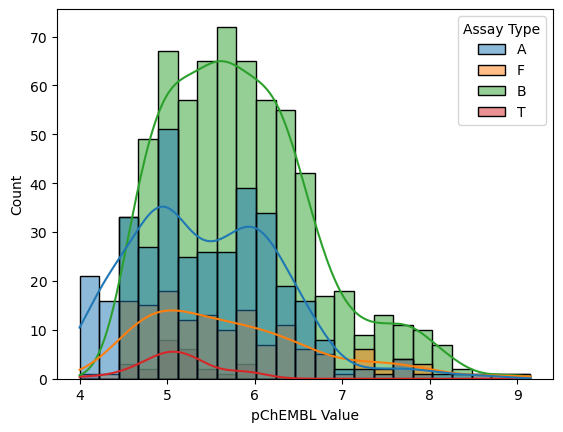

In [32]:
sns.histplot(data=more_than_N_compounds, x="pChEMBL Value", hue="Assay Type", kde=True)

<Axes: xlabel='Molecular Weight', ylabel='Count'>

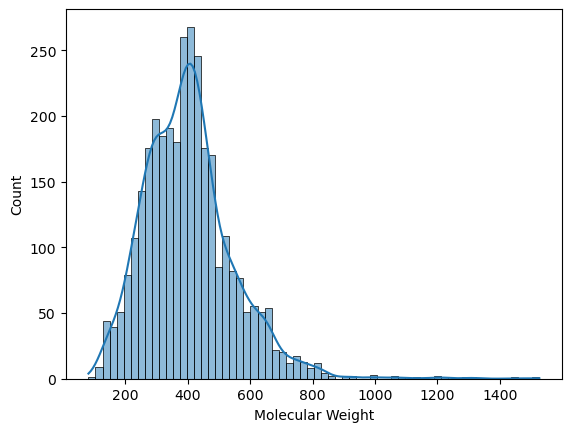

In [33]:
sns.histplot(data=more_than_N_compounds, x="Molecular Weight",  kde=True)

In [34]:
assays = more_than_N_compounds["Assay ChEMBL ID"].nunique()

In [35]:
assays

43

In [36]:
more_than_N_compounds["Molecule ChEMBL ID"].nunique()

1878

In [37]:
num_assays_per_compound_df = more_than_N_compounds.groupby(["INCHIKEY"])["Assay ChEMBL ID"].size().reset_index(name="assay_count")
num_assays_per_compound_df = num_assays_per_compound_df.set_index("INCHIKEY")
num_assays_per_compound_df

,assay_count
INCHIKEY,
AAKJLRGGTJKAMG-UHFFFAOYSA-N,2
AAOLZGDIONWLEW-UHFFFAOYSA-N,1
AAQOQKQBGPPFNS-UHFFFAOYSA-N,3
ABJKWBDEJIDSJZ-UHFFFAOYSA-N,1
ACHYQRJTXWSXNR-UHFFFAOYSA-N,2
...,...
ZXERDUOLZKYMJM-ZWECCWDJSA-N,3
ZXLFWPREOVAREF-UHFFFAOYSA-N,1
ZXNRTKGTQJPIJK-UHFFFAOYSA-N,3


<Axes: xlabel='assay_count', ylabel='count'>

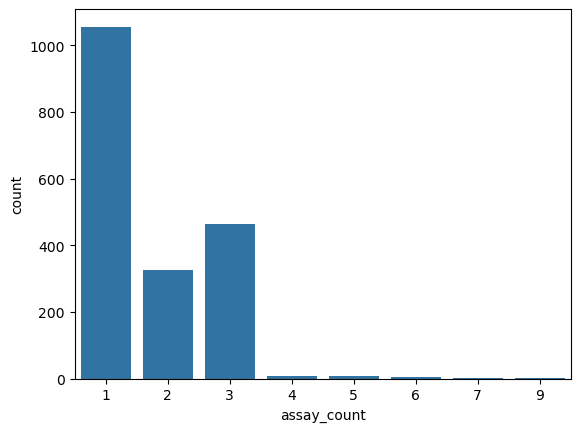

In [38]:
sns.countplot(data=num_assays_per_compound_df, x="assay_count")

In [39]:
combined_2 = more_than_N_compounds.join(num_assays_per_compound_df, on="INCHIKEY")


In [40]:
combined_2.sort_values("assay_count", ascending=False, inplace=True)
combined_2["assay_count"] = combined_2["assay_count"].astype(int)

# Aggregate activity

In [41]:
compound_grouped_mean = combined_2.groupby("INCHIKEY")["pChEMBL Value"].mean()
compound_grouped_mean.reset_index()

,INCHIKEY,pChEMBL Value
0,AAKJLRGGTJKAMG-UHFFFAOYSA-N,NaN
1,AAOLZGDIONWLEW-UHFFFAOYSA-N,6.47
2,AAQOQKQBGPPFNS-UHFFFAOYSA-N,NaN
3,ABJKWBDEJIDSJZ-UHFFFAOYSA-N,4.70
4,ACHYQRJTXWSXNR-UHFFFAOYSA-N,6.19
...,...,...
1862,ZXERDUOLZKYMJM-ZWECCWDJSA-N,4.58
1863,ZXLFWPREOVAREF-UHFFFAOYSA-N,NaN
1864,ZXNRTKGTQJPIJK-UHFFFAOYSA-N,NaN
1865,ZXVNMYWKKDOREA-UHFFFAOYSA-N,NaN


<Axes: xlabel='pChEMBL mean', ylabel='Count'>

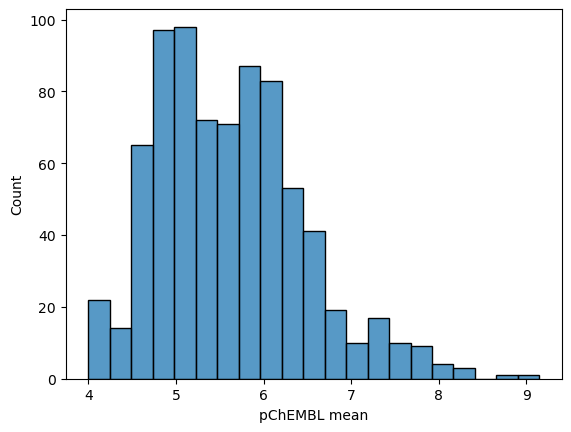

In [42]:
sns.histplot(data=compound_grouped_mean.reset_index(name="pChEMBL mean"),x="pChEMBL mean")

In [43]:
# join 
cgm = compound_grouped_mean.reset_index(name="pChEMBL mean")
cgm = cgm.set_index("INCHIKEY")
combined_3 = combined_2.join(cgm, on="INCHIKEY")


In [44]:
compound_grouped_std = combined_2.groupby("INCHIKEY")["pChEMBL Value"].std()
compound_grouped_std.reset_index()

,INCHIKEY,pChEMBL Value
0,AAKJLRGGTJKAMG-UHFFFAOYSA-N,NaN
1,AAOLZGDIONWLEW-UHFFFAOYSA-N,NaN
2,AAQOQKQBGPPFNS-UHFFFAOYSA-N,NaN
3,ABJKWBDEJIDSJZ-UHFFFAOYSA-N,NaN
4,ACHYQRJTXWSXNR-UHFFFAOYSA-N,0.042426
...,...,...
1862,ZXERDUOLZKYMJM-ZWECCWDJSA-N,NaN
1863,ZXLFWPREOVAREF-UHFFFAOYSA-N,NaN
1864,ZXNRTKGTQJPIJK-UHFFFAOYSA-N,NaN
1865,ZXVNMYWKKDOREA-UHFFFAOYSA-N,NaN


<Axes: xlabel='pChEMBL stdev', ylabel='Count'>

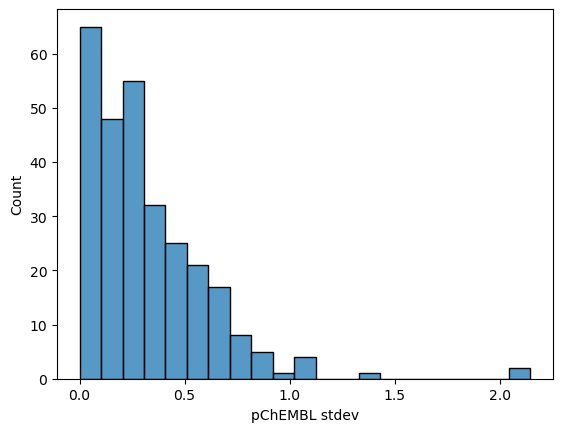

In [45]:
sns.histplot(data=compound_grouped_std.reset_index(name="pChEMBL stdev"),x="pChEMBL stdev")

In [46]:
cgstd = compound_grouped_std.reset_index(name="pChEMBL std")
cgstd = cgstd.set_index("INCHIKEY")
combined_4 =  combined_3.join(cgstd, on="INCHIKEY")

In [47]:
combined_4

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count,assay_count,pChEMBL mean,pChEMBL std
6475,CHEMBL374478,RIFAMPIN,4.0,822.95,3.0,4.34,rifampicin,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C...,AC50,'>',...,NaN,NaN,NaN,30.0000,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,577,9,5.691429,0.601732
5446,CHEMBL374478,RIFAMPIN,4.0,822.95,3.0,4.34,Rifampicin,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C...,EC50,'=',...,NaN,NaN,NaN,0.2000,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,59,9,5.691429,0.601732
6859,CHEMBL374478,RIFAMPIN,4.0,822.95,3.0,4.34,1,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C...,EC50,'=',...,TIME = 24.0 hr,AGONIST,NaN,1.4000,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,66,9,5.691429,0.601732
5858,CHEMBL374478,RIFAMPIN,4.0,822.95,3.0,4.34,rifampicin,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C...,AC50,'>',...,NaN,NaN,NaN,30.0000,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,519,9,5.691429,0.601732
3913,CHEMBL374478,RIFAMPIN,4.0,822.95,3.0,4.34,rifampicin,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C...,AC50,'=',...,NaN,NaN,NaN,19.8996,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,841,9,5.691429,0.601732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,CHEMBL1535,HYDROXYCHLOROQUINE,4.0,335.88,0.0,3.78,hydroxychloroquine,CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,AC50,'>',...,NaN,NaN,NaN,10.0000,CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,XXSMGPRMXLTPCZ-UHFFFAOYSA-N,841,1,NaN,NaN
4189,CHEMBL1117,IDARUBICIN,4.0,497.50,0.0,1.02,idarubicin,CC(=O)[C@]1(O)Cc2c(O)c3c(c(O)c2[C@@H](O[C@H]2C...,AC50,'>',...,NaN,NaN,NaN,30.0000,CC(=O)[C@]1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=...,SZWGDFGULWLMIP-QTYSYGFNSA-N,841,1,NaN,NaN
4194,CHEMBL3935453,NaN,NaN,432.42,0.0,3.48,"3m, Mixture of enantiomer",NC(=O)c1cc(-c2ccc(F)cc2)c2ccc(CN3CCNC(C(F)(F)F...,EC50,'=',...,DOSE = 30.0 microM,AGONIST,NaN,7.1000,NC(=O)c1cc(-c2ccc(F)cc2)c2ccc(CN3CCNC(C(F)(F)F...,ZUPFJKSJZHRSRX-UHFFFAOYSA-N,31,1,5.150000,NaN
4172,CHEMBL4243206,NaN,NaN,411.60,NaN,NaN,26,C[Si](C)(O)c1ccc(N(CCc2ccccc2)S(=O)(=O)c2ccccc...,EC50,'=',...,NaN,NaN,NaN,14.0000,C[Si](C)(O)c1ccc(N(CCc2ccccc2)S(=O)(=O)c2ccccc...,KYIXMFDHWLZHHB-UHFFFAOYSA-N,11,1,4.850000,NaN


In [48]:
combined_4.INCHIKEY.nunique()

1867

# Calibration of thresholds for activity and stdev?

## variablitiy

We could subselect for inter-assay variability, but we should probably do a more in depth study into this. 

We would need to select ASSAYs that are outliers and drop them rather than dropping compounds most likely. 

Lets leave it for now. 

## activity

Lets take compounds with pChEMBL >= 5.0 (XC50 = 10 um)


In [49]:
pchembl_thresh = 5.0 
active = combined_4[combined_4["pChEMBL mean"] >= pchembl_thresh]

In [50]:
# now clean up 
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "pChEMBL mean", "pChEMBL std", "Molecule Name", "assay_count", "Action Type"]

In [51]:
clean_active = active[keep_cols]
clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)
clean_active_sorted = clean_active.sort_values(["common_name", "action_type"], ascending=[False, False]) # keep the ones with names if possible
clean_deduped = clean_active_sorted.drop_duplicates(subset="INCHIKEY", keep="first")
clean_deduped = clean_deduped.sort_values("appears_in_N_ChEMBL_assays", ascending=False)


/tmp/ipykernel_96273/1579042175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)


In [52]:
clean_active.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type
6475,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,5.691429,0.601732,RIFAMPIN,9,NaN
5446,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,5.691429,0.601732,RIFAMPIN,9,NaN
6859,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,5.691429,0.601732,RIFAMPIN,9,AGONIST
5858,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,5.691429,0.601732,RIFAMPIN,9,NaN
3913,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,5.691429,0.601732,RIFAMPIN,9,NaN


In [53]:
clean_deduped["action_type"].value_counts()

action_type
AGONIST            85
ACTIVATOR          76
INHIBITOR          38
INVERSE AGONIST    38
ANTAGONIST         31
BINDING AGENT       6
Name: count, dtype: int64

In [54]:
clean_deduped["action_type"] = clean_deduped["action_type"].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [55]:
clean_deduped["action_type"].value_counts()

action_type
agonist            85
activator          76
inhibitor          38
inverse agonist    38
antagonist         31
binding agent       6
Name: count, dtype: int64

In [56]:
clean_deduped["dataset"] = "ChEMBL_curated"
clean_deduped["active"] = True

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

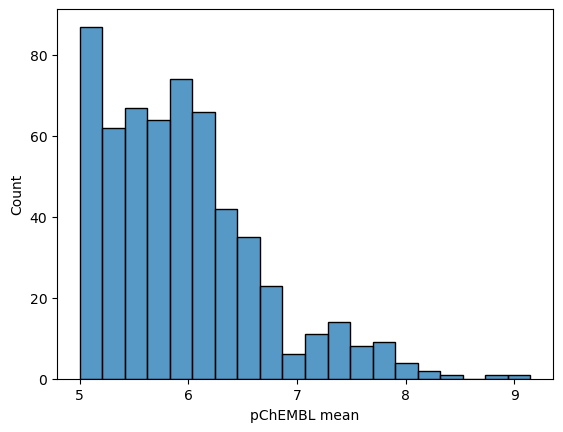

In [57]:
sns.histplot(data=clean_deduped, x="pChEMBL mean")

In [58]:
clean_deduped.to_csv("processed/chembl_active.csv", index=False)

# Subselect by number of assay appearances

In [59]:
L = 1 # compounds must appear in L or more assays

In [60]:


more_than_eq_L_assay = clean_deduped[clean_deduped["appears_in_N_ChEMBL_assays"] >= L]
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
6859,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,5.691429,0.601732,RIFAMPIN,9,agonist,ChEMBL_curated,True
4322,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,SGIWFELWJPNFDH-UHFFFAOYSA-N,7.556667,0.414037,T091317,6,inhibitor,ChEMBL_curated,True
163,COc1cc(C(=O)NS(=O)(=O)c2ccccc2C)ccc1Cc1cn(C)c2...,YEEZWCHGZNKEEK-UHFFFAOYSA-N,5.500000,0.708837,ZAFIRLUKAST,6,NaN,ChEMBL_curated,True
557,COC(=O)C1=C(C#N)N=C(C)C(C(=O)OC(C)C)C1c1cccc([...,KJWGEXJCWCYEMI-UHFFFAOYSA-N,5.912000,0.187270,NILVADIPINE,6,NaN,ChEMBL_curated,True
3924,CC(C)(ON=C(C(=O)NC1C(=O)N2C(C(=O)[O-])=C(C[n+]...,ORFOPKXBNMVMKC-XPKAQORNSA-N,6.620000,0.183848,CEFTAZIDIME,5,NaN,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
3965,COC(=O)CN(c1ccc([Si](C)(C)O)cc1)S(=O)(=O)c1ccccc1,CHADRLVAUQMLCQ-UHFFFAOYSA-N,5.850000,NaN,NaN,1,NaN,ChEMBL_curated,True
1424,CS(=O)(=O)c1ccc(C#N)cc1C(=O)N1CCC(N(C2CC2)S(=O...,UKVXALXNKRQBET-UHFFFAOYSA-N,5.300000,NaN,NaN,1,NaN,ChEMBL_curated,True
1385,COc1ccc2c(c1)C1CC1(C(=O)N1C3CCC1CNC3)Cn1c-2c(C...,UCNRDEOTNRRDSE-UHFFFAOYSA-N,5.050000,NaN,NaN,1,NaN,ChEMBL_curated,True
3955,O=C(CC1CN(S(=O)(=O)c2ccc(F)cc2)c2ccc(C(O)(C(F)...,YOFKGHWSZHDQNO-UHFFFAOYSA-N,6.600000,NaN,NaN,1,NaN,ChEMBL_curated,True


In [61]:
more_than_eq_L_assay.INCHIKEY.nunique()

577

<Axes: xlabel='appears_in_N_ChEMBL_assays', ylabel='count'>

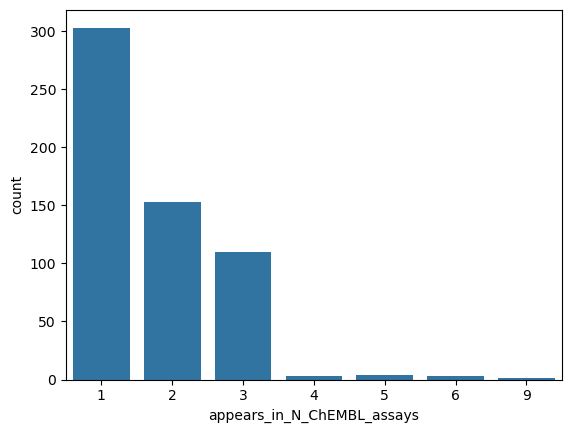

In [62]:
sns.countplot(data=more_than_eq_L_assay, x="appears_in_N_ChEMBL_assays")

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

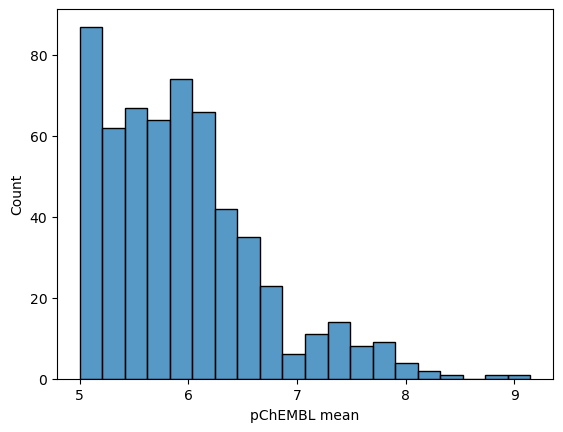

In [63]:
sns.histplot(data=more_than_eq_L_assay, x="pChEMBL mean")

In [64]:
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
6859,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(C=...,JQXXHWHPUNPDRT-ANMDCUJZSA-N,5.691429,0.601732,RIFAMPIN,9,agonist,ChEMBL_curated,True
4322,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,SGIWFELWJPNFDH-UHFFFAOYSA-N,7.556667,0.414037,T091317,6,inhibitor,ChEMBL_curated,True
163,COc1cc(C(=O)NS(=O)(=O)c2ccccc2C)ccc1Cc1cn(C)c2...,YEEZWCHGZNKEEK-UHFFFAOYSA-N,5.500000,0.708837,ZAFIRLUKAST,6,NaN,ChEMBL_curated,True
557,COC(=O)C1=C(C#N)N=C(C)C(C(=O)OC(C)C)C1c1cccc([...,KJWGEXJCWCYEMI-UHFFFAOYSA-N,5.912000,0.187270,NILVADIPINE,6,NaN,ChEMBL_curated,True
3924,CC(C)(ON=C(C(=O)NC1C(=O)N2C(C(=O)[O-])=C(C[n+]...,ORFOPKXBNMVMKC-XPKAQORNSA-N,6.620000,0.183848,CEFTAZIDIME,5,NaN,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
3965,COC(=O)CN(c1ccc([Si](C)(C)O)cc1)S(=O)(=O)c1ccccc1,CHADRLVAUQMLCQ-UHFFFAOYSA-N,5.850000,NaN,NaN,1,NaN,ChEMBL_curated,True
1424,CS(=O)(=O)c1ccc(C#N)cc1C(=O)N1CCC(N(C2CC2)S(=O...,UKVXALXNKRQBET-UHFFFAOYSA-N,5.300000,NaN,NaN,1,NaN,ChEMBL_curated,True
1385,COc1ccc2c(c1)C1CC1(C(=O)N1C3CCC1CNC3)Cn1c-2c(C...,UCNRDEOTNRRDSE-UHFFFAOYSA-N,5.050000,NaN,NaN,1,NaN,ChEMBL_curated,True
3955,O=C(CC1CN(S(=O)(=O)c2ccc(F)cc2)c2ccc(C(O)(C(F)...,YOFKGHWSZHDQNO-UHFFFAOYSA-N,6.600000,NaN,NaN,1,NaN,ChEMBL_curated,True


In [65]:
more_than_eq_L_assay["common_name"].value_counts()

common_name
RIFAMPIN              1
T091317               1
ZAFIRLUKAST           1
NILVADIPINE           1
CEFTAZIDIME           1
                     ..
ECONAZOLE             1
DIHYDROTACHYSTEROL    1
PRETILACHLOR          1
OXADIAZON             1
NORGESTIMATE          1
Name: count, Length: 145, dtype: int64

In [66]:
more_than_eq_L_assay.to_csv("processed/chembl_active_selected.csv", index=False)

In [67]:
more_than_eq_L_assay.action_type.value_counts()

action_type
agonist            85
activator          76
inhibitor          38
inverse agonist    38
antagonist         31
binding agent       6
Name: count, dtype: int64